# Stern-Gerlach

This exercise explores the famous setup with repeated Stern-Gerlach experiments. Well, obviously we will not do the original setup of Stern and Gerlach bending a beam of silver atoms, see e.g. example 4.4. in Griffiths and Schröeter, but we will set up an equivalent set of measurements using just a single qubit.

**What:** We will set up a series of measurements on a single qubit, equivalent to sequential Stern-Gerlach experiments. 

**Learning goal:** Understand better the effect of sequential measurements.



As always let's first import the relevant packages

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

We will perform the 3 experiments illustrated here (figure from From Wikipedia):



![From Wikipedia, the free encyclopedia](SternGerlach-Wiki.png "Sequential Stern-Gerlach measurements")

**How to read the figure:** In each of the 3 cases we start from the left with a source emitting a spin 1/2 particle and it is then passed through the Stern-Gerlach appratus oriented along the $z$-axis. The possible outcomes are illustrated by the two lines comming out of the right hand side of the S-G box (note that this is the two possible outputs of the measurement **not** two qubits). Only the spin up (along the $z$-axis) component is allowed to propagate. Then depending on which of the 3 experiments we consider we then set up a second (and third) Stern-Gerlach apparatus. 

**How to implement in IBM Q:** The beam emitted from the source consist of spin 1/2 particles (silver has a single outer electron that determines the spin of the total atom). Since this is a two state system we can represent it by a single qubit. Now the Stern-Gerlach apparatus measures the spin of the silver atom (determined by a single electron) along a given axis. In IBM Q this is just as our measuring device! So all we need is a single qubit and appropriately oriented measuring devises.

**The source:** We will start the qubit in the state 

\begin{equation}
|\psi\rangle = \frac{1}{\sqrt{2}}(|\uparrow\rangle+|\downarrow\rangle)
\end{equation}

where 'up' and 'down' are wrt the $z$-axis. 

**First experiment:**

In the first case all we need are two measuring devises ordered in the standad fashing along the $z$-axis. 

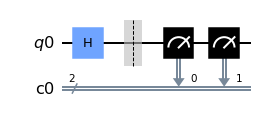

In [2]:
q=QuantumRegister(1)
c=ClassicalRegister(2)
circ= QuantumCircuit(q,c)
circ.h(0) # puts the first q-bit in the desired state
circ.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circ.measure(0,0)
circ.measure(q[0],c[1])
circ.draw()

**But wait!** In the figure above the spin down beam is blocked from propagating into the next Stern-Gerlach apparatus!

**Exercise 1:** Argue that if we only consider the results obtained if the first measurement gives spin up (along the $z$-axis) then this is equivalent to the top experiment of the figure above. 

**Exercise 2:** Argue that the propability to obtain sipn up (along the $z$-axis) in the second measurement is 1 (provided that we only consider the cases where the first measurement gives spin up).

Now let's check!

**Note:** We have put in a conditional statement so we only look at the results if the outcome of the first measurement is spin up. 

In [17]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=11, memory=True).result()
memory = result.get_memory(circ)
for x in memory:
    if x[0]=="1":
        no1 = 1/2
        if x[1]=="0":
            no2=0
        if x[1]=="1":
            no2=1/2
        print('First measurement', no1,'hbar' '   Second measurement', no2,'hbar')
        print()

First measurement 0.5 hbar   Second measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0 hbar



**Second experiment:**

Now we turn to the second experinemt and instead let the second measurement of the spin be along the $x$-axis.

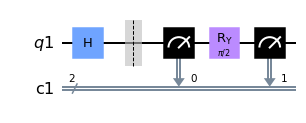

In [11]:
q=QuantumRegister(1)
c=ClassicalRegister(2)
circ= QuantumCircuit(q,c)
circ.h(0) # puts the first q-bit in the desired state
circ.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circ.measure(0,0)
circ.ry(np.pi/2,0)
circ.measure(q[0],c[1])
circ.draw()

In [16]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=11, memory=True).result()
memory = result.get_memory(circ)
for x in memory:
    if x[0]=="1":
        no1 = 1/2
        if x[1]=="0":
            no2=0
        if x[1]=="1":
            no2=1/2
        print('First measurement', no1,'hbar' '   Second measurement', no2,'hbar')
        print()

First measurement 0.5 hbar   Second measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0 hbar



**Note:** As aboove we print only those results where the outcome of the first measurement is spin up.

**Exercise 3:** Explain the result of the experiment we have just carried out.

**Third experiment:**

Finally let's us turn to the third experiment in the figure above. To do so we add a third measurement of the spin along the $z$-axis.

Here we go!

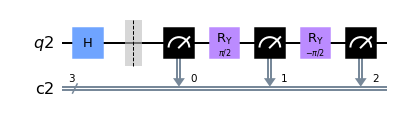

In [24]:
q=QuantumRegister(1)
c=ClassicalRegister(3)
circ= QuantumCircuit(q,c)
circ.h(0) # puts the first q-bit in the desired state
circ.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circ.measure(0,0)
circ.ry(np.pi/2,0)
circ.measure(q[0],c[1])
circ.ry(-np.pi/2,0)
circ.measure(0,2)
circ.draw()

In [30]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=80, memory=True).result()
memory = result.get_memory(circ)
for x in memory:
    if x[0]=="1" and x[1]=="1":
        no1 = 1/2
        if x[1]=="0":
            no2=0
        if x[1]=="1":
            no2=1/2
            if x[2]=="0":
                no3=0
            if x[2]=="1":
                no3=1/2
        print('First measurement', no1,'hbar''   Second measurement', no2,'hbar''  Third measurement', no3,'hbar')
        print()

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0.5 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third measurement 0 hbar

First measurement 0.5 hbar   Second measurement 0.5 hbar  Third meas

**Note:** In order to reproduce the 3rd experiment in the figure above we only print the results when the first and the second measurement both gives spin up (first along the $z$-axis then along the $x$-axis).

**Exercise 4:** Explain why the final measurement of $S_z$ can give spin down, even though the first measuremnt of $S_z$ has singled out the spin-up $z$-component.  

**Take home:** Measurements affect the sate of the system. After the measurement the state of the system becomes an eigenstate of the oprerator measured. Which eigenstate? The one belonging to the eigenvalue that was measured. Here the measuremnt of $S_x$ inserted between the two measurements of $S_z$ changes the spin-state thereby allowing for a non zero spin down component of the spin in the $z$-direction. 